In [110]:
import numpy as np

In [170]:
def convolve_generate_data(images, labels, kernel_size=3, stride=1, flatten=False):
    batch_size, in_dim, _, num_channels = images.shape # image dimensions
    
    out_dim = int((in_dim - kernel_size) / stride) + 1 # calculate output dimensions
    
#     print(out_dim)
    
    # create the matrix to hold the chopped images
    out_images = np.zeros((batch_size, out_dim, out_dim, kernel_size, kernel_size, num_channels))
    out_labels = np.zeros((batch_size, out_dim, out_dim))
    
#     print(out.shape)

    curr_y = out_y = 0
    # move kernel vertically across the image
    while curr_y + kernel_size <= in_dim:
        curr_x = out_x = 0
        # move kernel horizontally across the image
        while curr_x + kernel_size <= in_dim:
#             print(out_x, out_y)
            # chop images
            out_images[:, out_x, out_y] = images[:, curr_x:curr_x+kernel_size, curr_y:curr_y+kernel_size, :]
            curr_x += stride
            out_x += 1
        curr_y += stride
        out_y += 1
    
    if flatten:
        out_images = out_images.reshape(batch_size, out_dim, out_dim, -1)
    out_labels[:,] = labels.reshape(-1, 1, 1)
    return out_images, out_labels, out_dim

In [112]:
image = np.arange(2592).reshape(32,9,9,1)
# print(image)

In [113]:
get_sub_images(image, flatten=False)[1].shape

(7, 7, 3, 3, 1)

In [114]:
get_sub_images(image, flatten=True)[1].shape

(7, 7, 9)

In [115]:
get_sub_images(image, flatten=False).shape

(32, 7, 7, 3, 3, 1)

In [116]:
import torchvision.datasets as datasets

In [117]:
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)

In [118]:
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

In [269]:
mnist_train_images = mnist_trainset.train_data.numpy()[..., np.newaxis][:100]
mnist_train_labels = mnist_trainset.train_labels.numpy()[:100]
mnist_test_images = mnist_testset.test_data.numpy()[..., np.newaxis]
mnist_test_labels = mnist_testset.test_labels.numpy()

In [280]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
mnist_train_labels = lb.fit(mnist_train_labels).
mnist_test_labels = lb.fit(mnist_test_labels)

In [281]:
mnist_train_images_sub, mnist_train_labels_sub, out_dim = convolve_generate_data(mnist_train_images, mnist_train_labels, kernel_size=3, flatten=True)

AttributeError: 'LabelBinarizer' object has no attribute 'reshape'

In [271]:
print(mnist_train_images_sub[0][10][10])
print(mnist_train_labels_sub[0][12][10])

[  1. 154. 253.   0. 139. 253.   0.  11. 190.]
5.0


In [272]:
from matplotlib import pyplot as plt
%matplotlib inline 

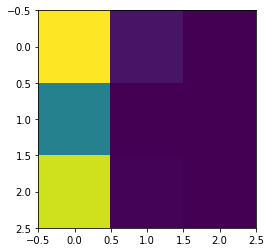

In [273]:
plt.imshow(mnist_train_images_sub[0][9][13].reshape(3,3), interpolation='nearest')
plt.show()

In [274]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [275]:
clf = RandomForestClassifier()
clf.fit(mnist_train_images_sub[:,1,1],mnist_train_labels_sub[:,1,1])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [276]:
stacked_classifiers = [[0]*out_dim for _ in range(out_dim)]
for i in range(out_dim):
    for j in range(out_dim):
        clf = RandomForestClassifier()
        clf.fit(mnist_train_images_sub[:, i, j], mnist_train_labels_sub[:, i, j])
        stacked_classifiers[i][j] = clf

In [279]:
mnist_test_images_sub, mnist_test_labels_sub, out_dim = convolve_generate_data(mnist_test_images, mnist_test_labels, kernel_size=3, flatten=True)
stacked_classifiers_pred = np.zeros((mnist_test_images.shape[0], out_dim, out_dim))
for i in range(out_dim):
    for j in range(out_dim):
        stacked_classifiers_pred[:, i, j] = stacked_classifiers[i][j].predict(mnist_test_images_sub[:, i, j])

(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(10000,)
(

In [178]:
from scipy import stats

In [204]:
mode, _ = stats.mode(stacked_classifiers_pred.reshape(len(mnist_test_images), -1), axis=1)
print(mode.shape)

(10000, 1)


In [205]:
print("Validation Accuracy: " + str(accuracy_score(mnist_test_labels,mode)))
print(stats.mode(stacked_classifiers_pred[0].flatten())[0])

Validation Accuracy: 0.1176
[1.]


In [206]:
print("Validation Confusion Matrix: \n" + str(confusion_matrix(mnist_test_labels,mode)))

Validation Confusion Matrix: 
[[  41  939    0    0    0    0    0    0    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [   0 1032    0    0    0    0    0    0    0    0]
 [   0 1010    0    0    0    0    0    0    0    0]
 [   0  982    0    0    0    0    0    0    0    0]
 [   0  892    0    0    0    0    0    0    0    0]
 [   0  958    0    0    0    0    0    0    0    0]
 [   0 1028    0    0    0    0    0    0    0    0]
 [   0  974    0    0    0    0    0    0    0    0]
 [   0 1009    0    0    0    0    0    0    0    0]]


In [248]:
stacked_classifiers_pred_level_1 = np.zeros((mnist_train_images.shape[0], out_dim, out_dim))
for i in range(out_dim):
    for j in range(out_dim):
        stacked_classifiers_pred_level_1[:, i, j] = stacked_classifiers[i][j].predict(mnist_train_images_sub[:, i, j])

In [249]:
mnist_train_images_sub_2, mnist_train_labels_sub_2, out_dim_2 = convolve_generate_data(stacked_classifiers_pred_level_1[..., np.newaxis], mnist_train_labels, stride=2, kernel_size=3, flatten=True)

In [250]:
stacked_classifiers_2 = [[0]*out_dim_2 for _ in range(out_dim_2)]
for i in range(out_dim_2):
    for j in range(out_dim_2):
        clf = RandomForestClassifier()
        clf.fit(mnist_train_images_sub_2[:, i, j],mnist_train_labels_sub_2[:, i, j])
        stacked_classifiers_2[i][j] = clf

In [251]:
stacked_classifiers_pred_level_2 = np.zeros((mnist_train_images.shape[0], out_dim_2, out_dim_2))
for i in range(out_dim_2):
    for j in range(out_dim_2):
        stacked_classifiers_pred_level_2[:, i, j] = stacked_classifiers_2[i][j].predict(mnist_train_images_sub_2[:, i, j])

In [252]:
mode, _ = stats.mode(stacked_classifiers_pred_level_2.reshape(len(mnist_train_images), -1), axis=1)

In [253]:
print("Validation Accuracy: " + str(accuracy_score(mnist_train_labels,mode)))
print(stats.mode(stacked_classifiers_pred_level_2[0].flatten())[0])

Validation Accuracy: 0.9612666666666667
[5.]


In [254]:
print("Validation Confusion Matrix: \n" + str(confusion_matrix(mnist_train_labels,mode)))

Validation Confusion Matrix: 
[[5904   19    0    0    0    0    0    0    0    0]
 [   0 6742    0    0    0    0    0    0    0    0]
 [   0  100 5858    0    0    0    0    0    0    0]
 [   0  188    0 5943    0    0    0    0    0    0]
 [   0  212    0    0 5630    0    0    0    0    0]
 [   0  290    0    0    0 5131    0    0    0    0]
 [   0  268    0    0    0    0 5650    0    0    0]
 [   0  191    0    0    0    0    0 6074    0    0]
 [   0  264    0    0    0    0    0    0 5587    0]
 [   0  792    0    0    0    0    0    0    0 5157]]


In [255]:
mnist_train_images_sub_3, mnist_train_labels_sub_3, out_dim_3 = convolve_generate_data(stacked_classifiers_pred_level_2[..., np.newaxis], mnist_train_labels, stride=2, kernel_size=3, flatten=True)

In [256]:
stacked_classifiers_3 = [[0]*out_dim_3 for _ in range(out_dim_3)]
for i in range(out_dim_3):
    for j in range(out_dim_3):
        clf = RandomForestClassifier()
        clf.fit(mnist_train_images_sub_3[:, i, j],mnist_train_labels_sub_3[:, i, j])
        stacked_classifiers_3[i][j] = clf

In [257]:
stacked_classifiers_pred_level_3 = np.zeros((mnist_train_images.shape[0], out_dim_3, out_dim_3))
for i in range(out_dim_3):
    for j in range(out_dim_3):
        stacked_classifiers_pred_level_3[:, i, j] = stacked_classifiers_3[i][j].predict(mnist_train_images_sub_3[:, i, j])

In [258]:
mode, _ = stats.mode(stacked_classifiers_pred_level_3.reshape(len(mnist_train_images), -1), axis=1)

In [259]:
print("Validation Accuracy: " + str(accuracy_score(mnist_train_labels,mode)))
print(stats.mode(stacked_classifiers_pred_level_3[0].flatten())[0])

Validation Accuracy: 1.0
[5.]


In [260]:
print("Validation Confusion Matrix: \n" + str(confusion_matrix(mnist_train_labels,mode)))

Validation Confusion Matrix: 
[[5923    0    0    0    0    0    0    0    0    0]
 [   0 6742    0    0    0    0    0    0    0    0]
 [   0    0 5958    0    0    0    0    0    0    0]
 [   0    0    0 6131    0    0    0    0    0    0]
 [   0    0    0    0 5842    0    0    0    0    0]
 [   0    0    0    0    0 5421    0    0    0    0]
 [   0    0    0    0    0    0 5918    0    0    0]
 [   0    0    0    0    0    0    0 6265    0    0]
 [   0    0    0    0    0    0    0    0 5851    0]
 [   0    0    0    0    0    0    0    0    0 5949]]


In [261]:
mnist_train_images_sub_4, mnist_train_labels_sub_4, out_dim_4 = convolve_generate_data(stacked_classifiers_pred_level_3[..., np.newaxis], mnist_train_labels, kernel_size=3, flatten=True)
stacked_classifiers_4 = [[0]*out_dim_4 for _ in range(out_dim_4)]
for i in range(out_dim_4):
    for j in range(out_dim_4):
        clf = RandomForestClassifier()
        clf.fit(mnist_train_images_sub_4[:, i, j],mnist_train_labels_sub_4[:, i, j])
        stacked_classifiers_4[i][j] = clf

In [262]:
stacked_classifiers_pred_level_1 = np.zeros((mnist_test_images.shape[0], out_dim, out_dim))
for i in range(out_dim):
    for j in range(out_dim):
        stacked_classifiers_pred_level_1[:, i, j] = stacked_classifiers[i][j].predict(mnist_test_images_sub[:, i, j])

mnist_test_images_sub_2, mnist_test_labels_sub_2, out_dim_2 = convolve_generate_data(stacked_classifiers_pred_level_1[..., np.newaxis], mnist_test_labels, stride=2, kernel_size=3, flatten=True)

stacked_classifiers_pred_level_2 = np.zeros((mnist_test_images.shape[0], out_dim_2, out_dim_2))
for i in range(out_dim_2):
    for j in range(out_dim_2):
        stacked_classifiers_pred_level_2[:, i, j] = stacked_classifiers_2[i][j].predict(mnist_test_images_sub_2[:, i, j])

mode, _ = stats.mode(stacked_classifiers_pred_level_2.reshape(len(mnist_test_images), -1), axis=1)

print("Validation Accuracy: " + str(accuracy_score(mnist_test_labels,mode)))
print(stats.mode(stacked_classifiers_pred_level_2[0].flatten())[0])

print("Validation Confusion Matrix: \n" + str(confusion_matrix(mnist_test_labels,mode)))

mnist_test_images_sub_3, mnist_test_labels_sub_3, out_dim_3 = convolve_generate_data(stacked_classifiers_pred_level_2[..., np.newaxis], mnist_test_labels, stride=2, kernel_size=3, flatten=True)

stacked_classifiers_pred_level_3 = np.zeros((mnist_test_images.shape[0], out_dim_3, out_dim_3))
for i in range(out_dim_3):
    for j in range(out_dim_3):
        stacked_classifiers_pred_level_3[:, i, j] = stacked_classifiers_3[i][j].predict(mnist_test_images_sub_3[:, i, j])

mode, _ = stats.mode(stacked_classifiers_pred_level_3.reshape(len(mnist_test_images), -1), axis=1)

print("Validation Accuracy: " + str(accuracy_score(mnist_test_labels,mode)))
print(stats.mode(stacked_classifiers_pred_level_3[0].flatten())[0])

print("Validation Confusion Matrix: \n" + str(confusion_matrix(mnist_test_labels,mode)))

Validation Accuracy: 0.4371
[7.]
Validation Confusion Matrix: 
[[ 748  228    0    0    0    0    4    0    0    0]
 [   0 1135    0    0    0    0    0    0    0    0]
 [  14  563  444    4    0    0    1    5    1    0]
 [   4  585    3  409    0    0    1    8    0    0]
 [   0  664    4    0  311    0    0    2    0    1]
 [   9  765    1   35    0   81    0    1    0    0]
 [  17  339    1    0    0    0  601    0    0    0]
 [   0  546    1    0    1    0    0  480    0    0]
 [  16  850    3    9    1    0    0    1   94    0]
 [   8  892    1    0    7    0    0   33    0   68]]
Validation Accuracy: 0.8343
[7.]
Validation Confusion Matrix: 
[[ 870   12   22   11    3   15   35    7    2    3]
 [   0 1124    6    1    0    0    2    0    2    0]
 [  16   43  846   53   14    1    6   28   20    5]
 [  10   20   40  862    1   25    3   28   16    5]
 [   4   41   15    3  846    3   21    6    5   38]
 [  16   30   16  146   20  592   16   13   33   10]
 [  49   20    8    7    

In [263]:
print(stacked_classifiers_pred_level_3.shape)

(10000, 5, 5)


In [267]:
mnist_test_images_sub_4, mnist_test_labels_sub_4, out_dim_4 = convolve_generate_data(stacked_classifiers_pred_level_3[..., np.newaxis], mnist_test_labels, kernel_size=3, flatten=True)

stacked_classifiers_pred_level_4 = np.zeros((mnist_test_images.shape[0], out_dim_4, out_dim_4))
for i in range(out_dim_4):
    for j in range(out_dim_4):
        stacked_classifiers_pred_level_4[:, i, j] = stacked_classifiers_4[i][j].predict(mnist_test_images_sub_4[:, i, j])

mode, _ = stats.mode(stacked_classifiers_pred_level_4.reshape(len(mnist_test_images), -1), axis=1)

print("Validation Accuracy: " + str(accuracy_score(mnist_test_labels,mode)))
print(stats.mode(stacked_classifiers_pred_level_4[0].flatten())[0])

print("Validation Confusion Matrix: \n" + str(confusion_matrix(mnist_test_labels,mode)))

Validation Accuracy: 0.6883
[7.]
Validation Confusion Matrix: 
[[ 699   64   53   30   10   36   46   20    0   22]
 [   0 1101   21    3    1    2    4    3    0    0]
 [   6  107  644  108   45   10   20   75    9    8]
 [   4   34   42  834    6   26    8   43    4    9]
 [   2   71   28   22  582   60  106   39   13   59]
 [   2   45   12  193   53  368   43  137   15   24]
 [  18   49   30   36   62   81  651   22    0    9]
 [   1   61   36   18   20   12   14  844    4   18]
 [   5   43   29  131   23   20   58   91  537   37]
 [   7   34   12   32   39   38   38  120   66  623]]
